In [418]:
%reset


In [419]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [421]:
%reload_ext autoreload
%autoreload 1

In [422]:
from hydroplotting import funcutils as fc

In [423]:
#read in data
path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_delta.day'
path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_grid.day'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_67.day'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_sim.day'

<Axes: xlabel='datetime'>

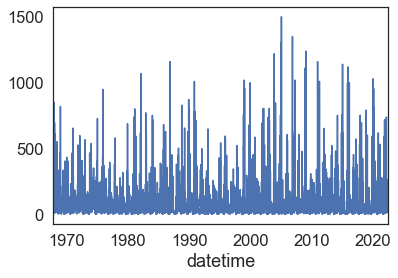

In [424]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
flow_obs.Q_cms.plot()
#flow_obs

In [425]:
#monthly mean
#flow_obs_mm = flow_obs.resample('M').mean()

In [426]:
#flow_obs

In [427]:
flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
flow_model.columns = ['year', 'month', 'day', 'Q_cms']
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
flow_model = flow_model.set_index('datetime')
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
#apply water year
fc.calc_water_year_apply(flow_model)
flow_model['water_year_str'] = flow_model['water_year'].astype(str)
#flow_model

In [428]:
#flow_model

In [429]:
period1_model = flow_model.loc['1981-10-01':'2000-09-30']
period2_model = flow_model.loc['2000-10-01':'2015-09-30']
period_all_model = flow_model.loc['1981-10-01':'2015-09-30']
period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()
period_all_model_monthly_mean = period_all_model.groupby(period_all_model.index.month).mean()

period1_obs = flow_obs.loc['1981-10-01':'2000-09-30']
period2_obs = flow_obs.loc['2000-10-01':'2015-09-30']
period_all_obs = flow_obs.loc['1981-10-01':'2015-09-30']
period1_obs_monthly_mean = period1_obs.groupby(period1_obs.index.month).mean()
period2_obs_monthly_mean = period2_obs.groupby(period2_obs.index.month).mean()
period_all_obs_monthly_mean = period_all_obs.groupby(period_all_obs.index.month).mean()


In [430]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)
period_all_model_monthly_mean_plot = month_wy_for_plotting(period_all_model_monthly_mean)

period1_obs_monthly_mean_plot = month_wy_for_plotting(period1_obs_monthly_mean)
period2_obs_monthly_mean_plot = month_wy_for_plotting(period2_obs_monthly_mean)
period_all_obs_monthly_mean_plot = month_wy_for_plotting(period_all_obs_monthly_mean)

Text(0, 0.5, 'Q [cms]')

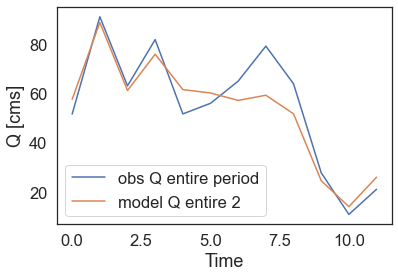

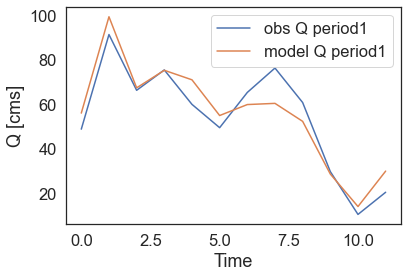

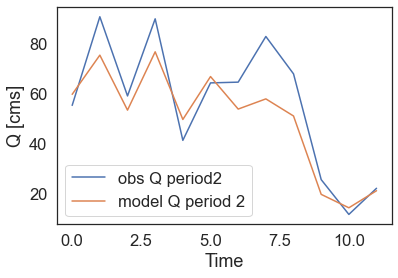

In [431]:
#f, (ax1, ax2) = plt.subplots(1, 2) # sharey=True
ax1 = period_all_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q entire period')
period_all_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q entire 2', ax = ax1)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax2 = period1_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period1')
period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1', ax = ax2)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

ax3 = period2_obs_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q period2')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period 2', ax = ax3)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')

#period1_model_monthly_mean

In [432]:
flow_model_by_wy = flow_model.groupby(['water_year_str'])
flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [433]:
wy_groups = flow_model_by_wy.groups
#wy_groups
wy_groups.keys()

dict_keys(['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [434]:
model_ = flow_model_by_wy.get_group('2005')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]


In [435]:
obs_ = flow_obs_by_wy.get_group('2005')
#or, get a specific year with this
#model_flow_2011 = flow_model[flow_model['water_year'] == 1981]
obs_


,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2004-10-01,2004,10,1,12.00,2004-10-01,2005,2005
2004-10-02,2004,10,2,11.10,2004-10-02,2005,2005
2004-10-03,2004,10,3,10.40,2004-10-03,2005,2005
2004-10-04,2004,10,4,10.00,2004-10-04,2005,2005
2004-10-05,2004,10,5,9.86,2004-10-05,2005,2005
...,...,...,...,...,...,...,...
2005-09-26,2005,9,26,3.10,2005-09-26,2005,2005
2005-09-27,2005,9,27,3.04,2005-09-27,2005,2005
2005-09-28,2005,9,28,2.96,2005-09-28,2005,2005


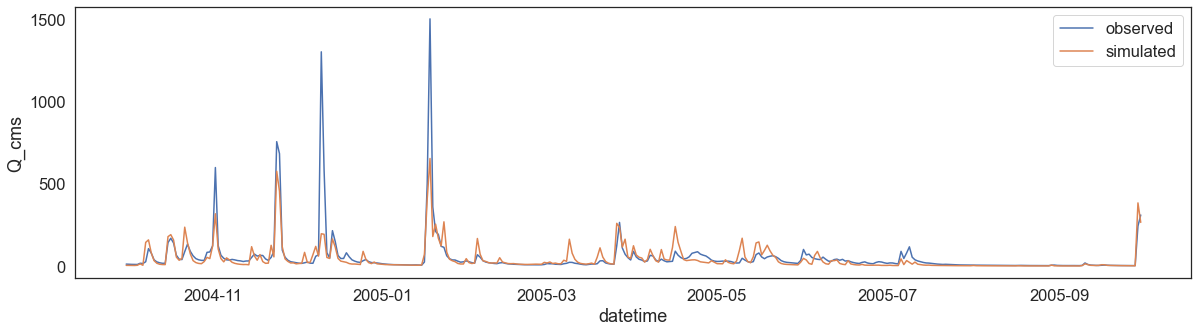

In [436]:
#sns.relplot(data = obs_2012, x="datetime", y="Q_cms", kind="line")
#merge obs and model in one dataframe to plot
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = obs_)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated', data = model_)
sns.set_theme(style='white', font_scale=3)

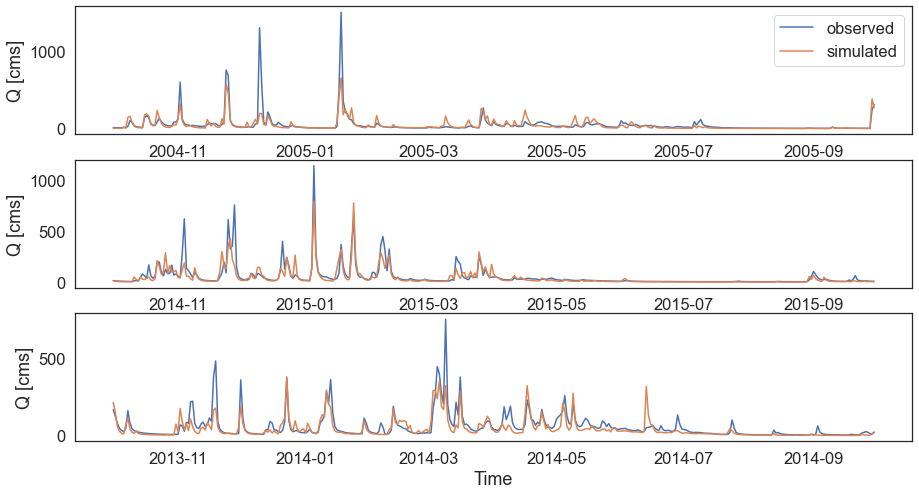

In [438]:
#plot three years
#select data

f, axes = plt.subplots(3, 1, figsize=(15, 8))
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2005'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated', data = flow_model_by_wy.get_group('2005'), ax=axes[0])
axes[0].set_ylabel('Q [cms]')

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2015'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_by_wy.get_group('2015'), ax=axes[1])
plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')


sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_by_wy.get_group('2014'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
sns.set_theme(style='white', font_scale=1.5)
plt.show()


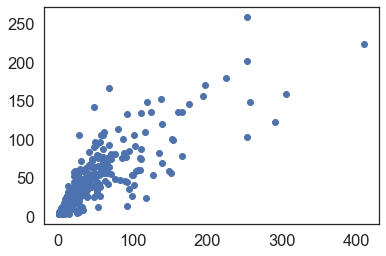

In [338]:
fig, ax = plt.subplots()
plt.scatter(model_['Q_cms'], obs_['Q_cms'])

In [339]:
Q_model_df = model_['Q_cms'].to_frame()
Q_obs_df = model_['Q_cms'].to_frame()
%compare_Q = pd.concat([Q_model_df,Q_obs_df])

UsageError: Line magic function `%compare_Q` not found.


In [340]:
deltaQ = model_['Q_cms'] - obs_['Q_cms']

<Axes: xlabel='datetime'>

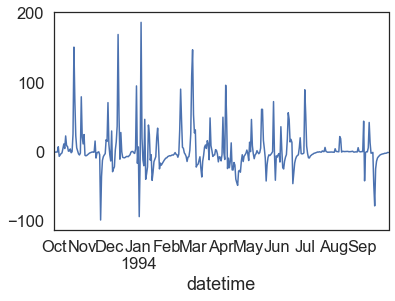

In [341]:
deltaQ.plot()

In [342]:
nse_test = fc.nse(model_['Q_cms'], obs_['Q_cms'])
nse_test

0.4695760780124395

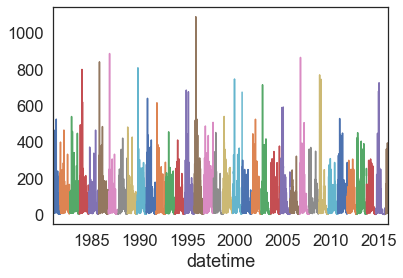

In [343]:
#initialize list
nse = []
year = []
for group in flow_obs_by_wy:
    for gr in flow_model_by_wy:
        if group[0]==gr[0]:
            nse_test = fc.nse(gr[1].Q_cms, group[1].Q_cms)
            gr[1].Q_cms.plot()
            #sns.relplot(data=gr[1], x="datetime", y="Q_cms", hue="month", kind="line")
            year.append(group[0])
            nse.append(nse_test)
            #nse(0) = gr[0]
            #nse(1) = nse_test
nse_run = dict(zip(year, nse))

In [344]:
nse_run

{'1981': 0.8418276463501899,
 '1982': 0.574385908333978,
 '1983': 0.7180247088721065,
 '1984': 0.7916408538556885,
 '1985': 0.49349336052579484,
 '1986': 0.7230132537475231,
 '1987': 0.8215479023190696,
 '1988': 0.6104842476390644,
 '1989': 0.6814992959046515,
 '1990': 0.5993186979317561,
 '1991': 0.5916376897243001,
 '1992': 0.6001578243890324,
 '1993': 0.5096517362210693,
 '1994': 0.4695760780124395,
 '1995': 0.5917051107134759,
 '1996': 0.4792508216110539,
 '1997': 0.4062444153355199,
 '1998': 0.49141393257226273,
 '1999': 0.5774294026522735,
 '2000': 0.7143122403748785,
 '2001': 0.5251401755484513,
 '2002': 0.713718711015886,
 '2003': 0.6445582302524326,
 '2004': 0.44130984550818586,
 '2005': 0.5490524342117764,
 '2006': 0.5490394548822772,
 '2007': 0.7480250643220803,
 '2008': 0.6372195103335581,
 '2009': 0.7813076703388945,
 '2010': 0.5117884225104672,
 '2011': 0.5803464577453261,
 '2012': 0.5353801209201201,
 '2013': 0.5267429483565449,
 '2014': 0.6054370965916367,
 '2015': 0.67

In [345]:
nse_all = nse_run.values()

data_nse = list(nse_all)
data_nse = np.array(data_nse)
min_nse = data_nse.min()
max_nse = data_nse.max()
med_nse = np.median(data_nse)
print(min_nse)
print(max_nse)
print(med_nse)

0.4062444153355199
0.8418276463501899
0.595511904322616


<Axes: ylabel='Count'>

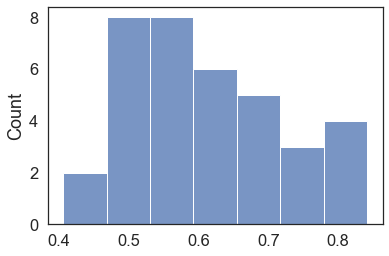

In [346]:


# print the numpy array
sns.histplot(data_nse)
#sns.boxplot(data_nse)

In [347]:
gr[1]

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
2015-10-01,2015,10,1,2.5254,2015-10-01,2016,2016
2015-10-02,2015,10,2,2.7429,2015-10-02,2016,2016
2015-10-03,2015,10,3,2.5225,2015-10-03,2016,2016
2015-10-04,2015,10,4,2.2434,2015-10-04,2016,2016
2015-10-05,2015,10,5,2.0567,2015-10-05,2016,2016
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.2745,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.3224,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.5175,2015-12-29,2016,2016


In [348]:
flow_model

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1981-01-01,1981,1,1,293.0408,1981-01-01,1981,1981
1981-01-02,1981,1,2,150.0106,1981-01-02,1981,1981
1981-01-03,1981,1,3,54.5558,1981-01-03,1981,1981
1981-01-04,1981,1,4,26.4270,1981-01-04,1981,1981
1981-01-05,1981,1,5,15.0815,1981-01-05,1981,1981
...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.2745,2015-12-27,2016,2016
2015-12-28,2015,12,28,8.3224,2015-12-28,2016,2016
2015-12-29,2015,12,29,10.5175,2015-12-29,2016,2016


In [349]:
#select periods
period1_model = flow_model.loc['1981-10-1':'2000-9-31']
period2_model = flow_model.loc['2000-10-1':'2015-9-31']

#period1_model_mean = period1_model.resample('M').mean()
#period2_model_mean = period2_model.resample('M').mean()

period1_model_monthly_mean = period1_model.groupby(period1_model.index.month).mean()
period2_model_monthly_mean = period2_model.groupby(period2_model.index.month).mean()


#test = flow_model.resample('M').mean()
#test = flow_model.resample('M').mean()
#multi_month_mean = flow_model.groupby(flow_model.index.month).mean()
#multi_month_mean.Q_cms.plot()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2000-9-31] of type str

In [350]:
def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period1_model_monthly_mean_plot = month_wy_for_plotting(period1_model_monthly_mean)
period2_model_monthly_mean_plot = month_wy_for_plotting(period2_model_monthly_mean)


In [351]:
period1_model_monthly_mean_plot

,year,month,day,Q_cms,water_year
0,1990.000000,10.0,16.000000,43.667774,1991.000000
1,1990.000000,11.0,15.500000,96.106731,1991.000000
2,1990.000000,12.0,16.000000,53.742733,1991.000000
3,1991.000000,1.0,16.000000,61.211232,1991.000000
4,1991.009311,2.0,14.635009,51.891954,1991.009311
5,1991.000000,3.0,16.000000,49.081326,1991.000000
6,1991.000000,4.0,15.500000,62.384968,1991.000000
7,1991.000000,5.0,16.000000,69.488546,1991.000000
8,1991.000000,6.0,15.500000,53.300595,1991.000000
9,1991.000000,7.0,16.000000,28.000219,1991.000000


Text(0, 0.5, 'Q [cms]')

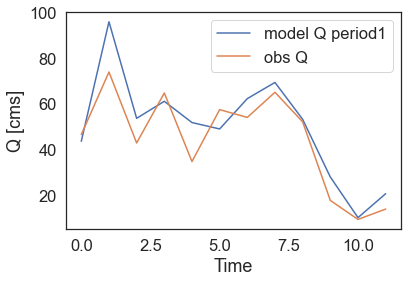

In [352]:


#period1_model_monthly_mean_plot.Q_cms.plot()

ax = period1_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'model Q period1')
period2_model_monthly_mean_plot.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
#ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Q [cms]')
#period1_model_monthly_mean


In [353]:
period1_model_monthly_mean

,year,month,day,Q_cms,water_year
datetime,,,,,
1,1991.000000,1.0,16.000000,61.211232,1991.000000
2,1991.009311,2.0,14.635009,51.891954,1991.009311
3,1991.000000,3.0,16.000000,49.081326,1991.000000
4,1991.000000,4.0,15.500000,62.384968,1991.000000
5,1991.000000,5.0,16.000000,69.488546,1991.000000
6,1991.000000,6.0,15.500000,53.300595,1991.000000
7,1991.000000,7.0,16.000000,28.000219,1991.000000
8,1991.000000,8.0,16.000000,10.182087,1991.000000
9,1991.000000,9.0,15.500000,20.682477,1991.000000


In [354]:
#plot modeled SWE vs. observed at Skookum Creek
ax = flow_model_month.plot(kind='line',  y = 'Q_cms', label = 'model Q')
flow_obs_month.plot(kind='line',  y = 'Q_cms', label = 'obs Q', ax = ax)
ax.set_xlim([datetime(1996, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

NameError: name 'flow_model_month' is not defined

In [239]:
type(nse_run)

dict